In [1]:
#get CPU Info
!lscpu

'lscpu' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
#get GPU Info
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
!pip install missingno
!pip install kaggle
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('house-prices-advanced-regression-techniques/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

house-prices-advanced-regression-techniques/data_description.txt
house-prices-advanced-regression-techniques/sample_submission.csv
house-prices-advanced-regression-techniques/test.csv
house-prices-advanced-regression-techniques/train.csv


In [5]:
#load data
filepath_train = 'house-prices-advanced-regression-techniques/train.csv'
filepath_test = 'house-prices-advanced-regression-techniques/test.csv'
data_train = pd.read_csv(filepath_train)
data_test = pd.read_csv(filepath_test)

In [6]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#check missing values
missing_count = data_test.isnull().sum()
print(missing_count)
total_missing = missing_count.sum()
print("total_missing", total_missing)
total_cell = np.product(data_test.shape)
print("total_cell", total_cell)
percent_missing = (total_missing / total_cell) * 100
print("percent_missing", percent_missing)

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64
total_missing 7000
total_cell 116720
percent_missing 5.9972583961617545


In [9]:
#Separate target value and index
from sklearn.model_selection import train_test_split
y_trainval = data_train.SalePrice
trainval_ID = data_train.Id
X_trainval = data_train.drop(['SalePrice', 'Id'], axis=1)
test_ID = data_test.Id
X_test = data_test.drop(['Id'], axis=1)


<AxesSubplot:>

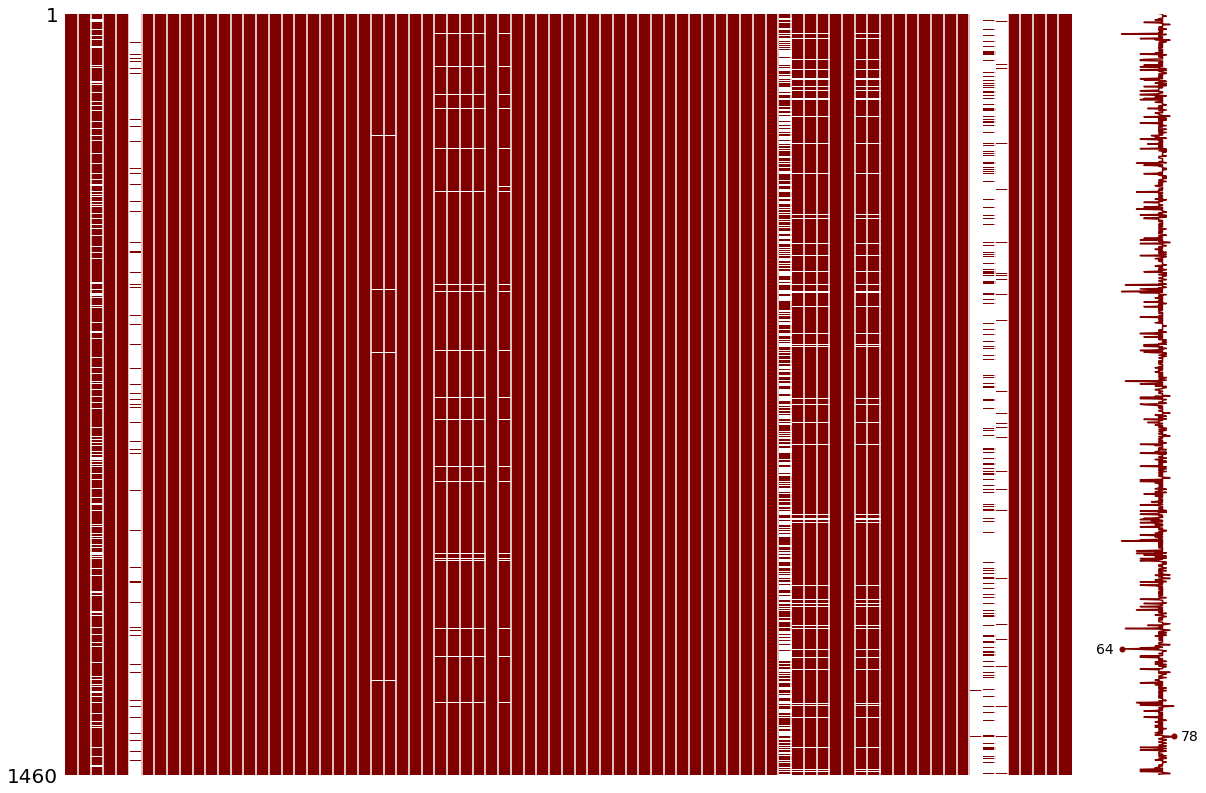

In [13]:
#vizualize whether the data has missing values
import missingno
missingno.matrix(df=X_trainval, figsize=(20,14), color=(0.5,0,0))

In [14]:
#Check which feature has missing values
print('training data+++++++++++++++++++++')
for i in np.arange(X_trainval.shape[1]):
    n = X_trainval.iloc[:,i].isnull().sum() 
    if n > 0:
        print(list(X_trainval.columns.values)[i] + ': ' + str(n) + ' nans')
print('testing data++++++++++++++++++++++ ')
for i in np.arange(X_test.shape[1]):
    n = X_test.iloc[:,i].isnull().sum() 
    if n > 0:
        print(list(X_test.columns.values)[i] + ': ' + str(n) + ' nans')

training data+++++++++++++++++++++
LotFrontage: 259 nans
Alley: 1369 nans
MasVnrType: 8 nans
MasVnrArea: 8 nans
BsmtQual: 37 nans
BsmtCond: 37 nans
BsmtExposure: 38 nans
BsmtFinType1: 37 nans
BsmtFinType2: 38 nans
Electrical: 1 nans
FireplaceQu: 690 nans
GarageType: 81 nans
GarageYrBlt: 81 nans
GarageFinish: 81 nans
GarageQual: 81 nans
GarageCond: 81 nans
PoolQC: 1453 nans
Fence: 1179 nans
MiscFeature: 1406 nans
testing data++++++++++++++++++++++ 
MSZoning: 4 nans
LotFrontage: 227 nans
Alley: 1352 nans
Utilities: 2 nans
Exterior1st: 1 nans
Exterior2nd: 1 nans
MasVnrType: 16 nans
MasVnrArea: 15 nans
BsmtQual: 44 nans
BsmtCond: 45 nans
BsmtExposure: 44 nans
BsmtFinType1: 42 nans
BsmtFinSF1: 1 nans
BsmtFinType2: 42 nans
BsmtFinSF2: 1 nans
BsmtUnfSF: 1 nans
TotalBsmtSF: 1 nans
BsmtFullBath: 2 nans
BsmtHalfBath: 2 nans
KitchenQual: 1 nans
Functional: 2 nans
FireplaceQu: 730 nans
GarageType: 76 nans
GarageYrBlt: 78 nans
GarageFinish: 78 nans
GarageCars: 1 nans
GarageArea: 1 nans
GarageQual: 

<AxesSubplot:>

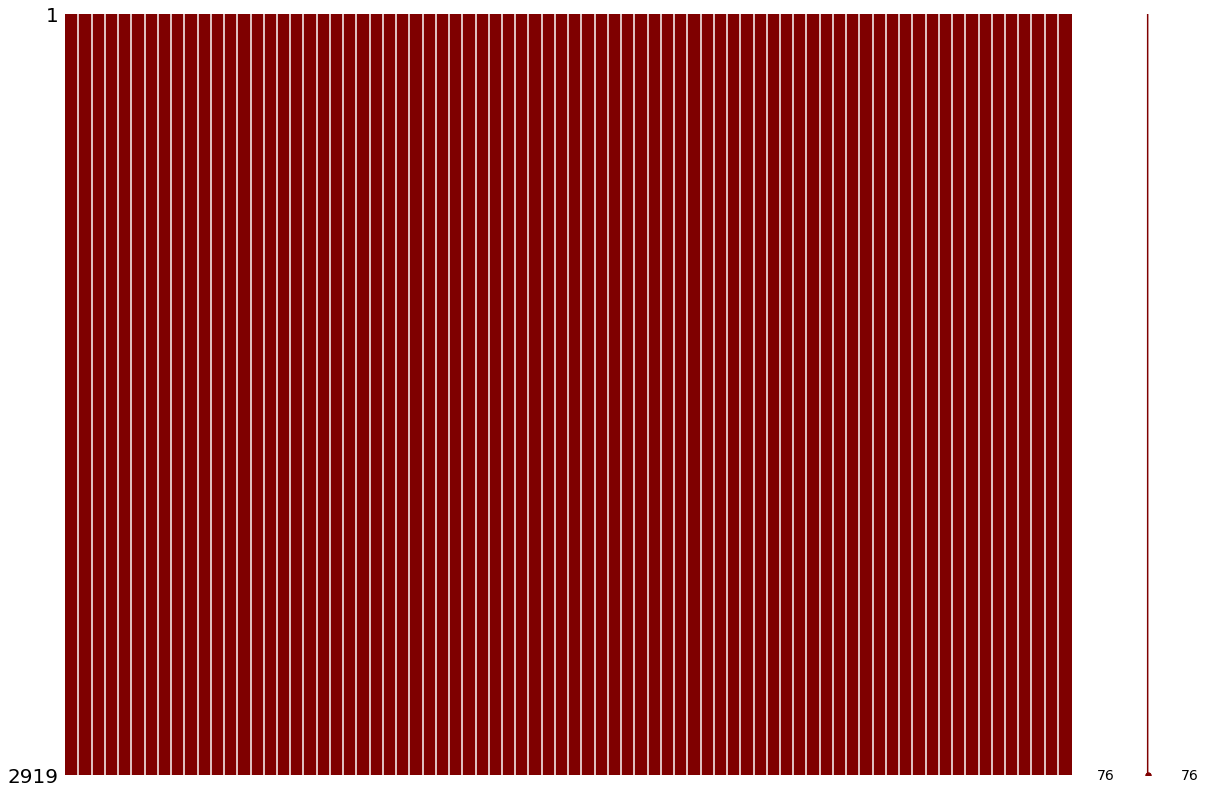

In [21]:
#Drop features have a lot of missing values and fill in missing values
from sklearn.impute import SimpleImputer
X_mat = pd.concat([X_trainval, X_test])
X_mat = X_mat.drop(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], axis=1)
impute = SimpleImputer(strategy='most_frequent')
X_mat = pd.DataFrame(impute.fit_transform(X_mat), columns=X_mat.columns)
#Check if the data still has missing values
missingno.matrix(df=X_mat, figsize=(20, 14), color=(0.5,0,0))


In [24]:
X_trainval = X_mat.iloc[:data_train.shape[0],:]
X_test = X_mat.iloc[data_train.shape[0]:,:]

In [25]:
#preprocess categorical data
from sklearn.preprocessing import OneHotEncoder
categorical_cols = [cname for cname in X_trainval.columns if X_trainval[cname].dtype == "object"]
low_cardinality_cols = [cname for cname in X_trainval.columns if X_trainval[cname].nunique() < 15 and 
                        X_trainval[cname].dtype == "object"]
OH = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_col_trainval = pd.DataFrame(OH.fit_transform(X_trainval[low_cardinality_cols]))
OH_col_test = pd.DataFrame(OH.transform(X_test[low_cardinality_cols]))
OH_col_trainval.index = X_trainval.index
OH_col_trainval.columns = OH.get_feature_names(low_cardinality_cols)
OH_col_test.index = X_test.index
OH_col_test.columns = OH.get_feature_names(low_cardinality_cols)
num_X_trainval = X_trainval.drop(categorical_cols, axis=1)
num_X_test = X_test.drop(categorical_cols, axis=1)
X_trainval = pd.concat([num_X_trainval, OH_col_trainval], axis=1)
X_test = pd.concat([num_X_test, OH_col_test], axis=1)

In [26]:
print(X_mat.columns.values)
print(str(X_mat.shape[1]) + 'columns')

['MSSubClass' 'MSZoning' 'LotArea' 'Street' 'Alley' 'LotShape'
 'LandContour' 'Utilities' 'LotConfig' 'LandSlope' 'Neighborhood'
 'Condition1' 'Condition2' 'BldgType' 'HouseStyle' 'OverallQual'
 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle' 'RoofMatl'
 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond'
 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1'
 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF' '2ndFlrSF'
 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath'
 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual' 'TotRmsAbvGrd'
 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType' 'GarageFinish'
 'GarageCars' 'GarageArea' 'GarageQual' 'GarageCond' 'PavedDrive'
 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch'
 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature' 'MiscVal' 'MoSold' 'YrSold'
 'SaleType' 'SaleCondition']
76columns


In [27]:
X_mat['TotalSF'] = X_mat['TotalBsmtSF'] + X_mat['1stFlrSF'] + X_mat['2ndFlrSF']
print('There are currently ' + str(X_mat.shape[1]) + ' columns.')

There are currently 77 columns.


C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


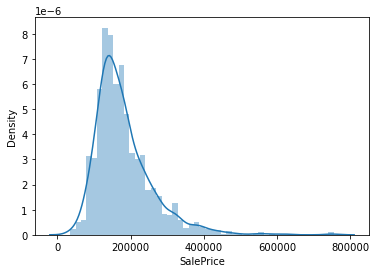

In [28]:
#Check if the target value is normally distributed
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.distplot(y_trainval)
plt.show()

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


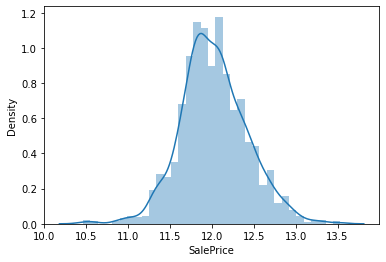

In [29]:
#Normalizing the target value by taking log
y_trainval = np.log(y_trainval)

ax = sns.distplot(y_trainval)
plt.show()

In [ ]:
#Make Pipeline for scaling data, choose degree for polynomial features and use Rige to evaluate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import Ridge
pipe_1 = make_pipeline(MinMaxScaler(), PolynomialFeatures(), RFE(DecisionTreeRegressor()), Ridge()) 
#pipe_1.get_params().keys()
param_grid_1 = {'polynomialfeatures__degree': [1, 2],'rfe__estimator__max_features': [20, 30], 'ridge__alpha': [10, 100]} 
grid_1 = GridSearchCV(pipe_1, param_grid=param_grid_1, cv=3, n_jobs=-1, verbose=2)
grid_1.fit(X_trainval, y_trainval)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
print(grid_1.best_score_)
print(grid_1.best_params_)

In [ ]:
results = pd.DataFrame(grid_1.cv_results_)
scores = pd.DataFrame(np.array(results.mean_test_score).reshape(2, 3))
sns.heatmap(scores,yticklabels=[1, 2], xticklabels=[10, 100, 1000])

In [ ]:
#Scaling data
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
scaler = MinMaxScaler()
scaler.fit(X_trainval)
X_trainval = DataFrame(scaler.transform(X_trainval), columns=X_trainval.columns)
X_test = DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
#Iterative Feature Selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
rf = RFE(RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=30)
rf.fit(X_trainval, y_trainval)
X_trainval = DataFrame(rf.transform(X_trainval), columns=X_trainval.columns)
X_test = DataFrame(rf.transform(X_test), columns=X_test.columns)

In [ ]:
print(rf.transform(X_trainval))

In [ ]:
print(X_test)

In [ ]:
#Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False).fit(X_trainval)
X_trainval = poly.transform(X_trainval)
X_test = poly.transform(X_test)
print(X_test)

In [ ]:
#Correlate top 30 features with the target value
fig = plt.figure(figsize=(12,7))
for i in np.arange(30):
    ax = fig.add_subplot(5,6,i+1)
    sns.regplot(x=X_trainval.iloc[:,i], y=y_trainval)

plt.tight_layout()
plt.show()

In [ ]:
# outlier deletion
Xmat = X_trainval
Xmat['SalePrice'] = y_trainval
Xmat = Xmat.drop(Xmat[(Xmat['TotalSF']>0.5) & (Xmat['SalePrice']<12.5)].index)
Xmat = Xmat.drop(Xmat[(Xmat['GrLivArea']>0.5) & (Xmat['SalePrice']<13)].index)

# recover
y_trainval = Xmat['SalePrice']
X_trainval = Xmat.drop(['SalePrice'], axis=1)

In [ ]:
# XGBoost Model
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

print("Parameter optimization")
xgb_model = xgb.XGBRegressor()
reg_xgb = GridSearchCV(xgb_model,{'max_depth': [1,2,4,6],'n_estimators': [100, 150, 200,250]}, cv=5)
X_trainval_xg = np.ascontiguousarray(X_trainval)
y_trainval_xg = np.ascontiguousarray(y_trainval)
reg_xgb.fit(X_trainval_xg, y_trainval_xg)
print(reg_xgb.best_score_)
print(reg_xgb.best_params_)

In [ ]:
#Analyzing result of cv XGB model
results = pd.DataFrame(reg_xgb.cv_results_)
scores = pd.DataFrame(np.array(results.mean_test_score).reshape(4, 4))
sns.heatmap(scores,yticklabels=[1, 2, 4, 6], xticklabels=[100, 150, 200, 250], square=True)

In [ ]:
#Neural Network Model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(X_trainval.shape[1], input_dim=X_trainval.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

nn_model = KerasRegressor(build_fn=create_model, verbose=0)
# define the grid search parameters
optimizer = ['SGD','Adam']
batch_size = [10, 30, 50]
epochs = [10, 50, 100]
param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)
reg_dl = GridSearchCV(estimator=nn_model, param_grid=param_grid, n_jobs=-1)
reg_dl.fit(X_trainval, y_trainval)

print(reg_dl.best_score_)
print(reg_dl.best_params_)

In [ ]:
#SVR Model
from sklearn.svm import SVR

reg_svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e1, 1e2, 1e3, 1e4],
                               "gamma": np.logspace(-4, 0, 5)})
reg_svr.fit(X_trainval, y_trainval)

print(reg_svr.best_score_)
print(reg_svr.best_params_)

In [ ]:
#Analyzing result of cv SVR Model
results_svr = pd.DataFrame(reg_svr.cv_results_)
scores_svr = pd.DataFrame(np.array(results_svr.mean_test_score).reshape(4, 5))
sns.heatmap(scores_svr, xticklabels=np.logspace(-4, 0, 5), yticklabels=[1e1, 1e2, 1e3, 1e4])


In [ ]:
# second feature matrix
X_train2 = pd.DataFrame( {'XGB': reg_xgb.predict(X_trainval_xg),
     'NN': reg_dl.predict(X_trainval).ravel(),
     'SVR': reg_svr.predict(X_trainval),
    })

In [ ]:
# second-feature modeling using linear regression
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train2, y_trainval)

# prediction using the test set
X_test_xgb = np.ascontiguousarray(X_test)
X_test2 = pd.DataFrame( {'XGB': reg_xgb.predict(X_test_xgb),
     'DL': reg_dl.predict(X_test).ravel(),
     'SVR': reg_svr.predict(X_test),
    })
y_pred = np.exp(reg.predict(X_test2))

In [ ]:
submission = pd.DataFrame({"Id": test_ID,"SalePrice": y_pred})
#submission.to_csv('houseprice.csv', index=False)